* Oleksandra Aliyeva
* May 2022

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result
???????????????????/


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1. Do smokers have higher insurance charges than non-smokers?
* Null Hypothesis: smokers and non-smokers have the same insurance charges. 
* Alternative Hypothesis: smokers have higher insurance charges than non-smokers.

**T-Tests** for this hypothesis

In [4]:
# see how many smokers and non-smokers
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
#filtering out those smokers and non-smokers
smoker = df.loc[df['smoker']=='yes'].copy()
non_smoker = df.loc[df['smoker']=='no'].copy()

In [6]:
smoker_charges = smoker['charges']
non_smoker_charges = non_smoker['charges']

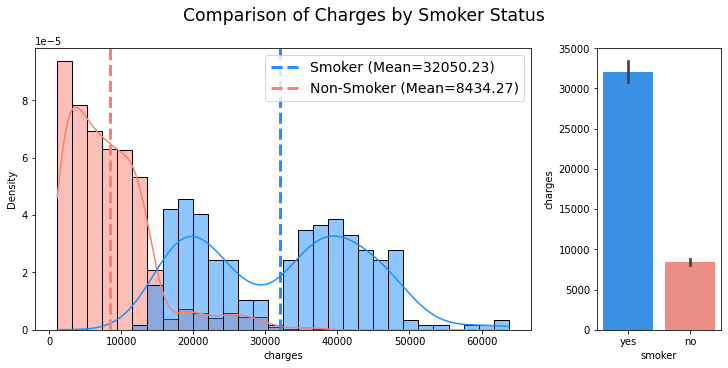

In [7]:
smoker_palette={'yes':'dodgerblue', "no":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True, hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"Smoker (Mean={np.mean(smoker_charges):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"Non-Smoker (Mean={np.mean(non_smoker_charges):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charges by Smoker Status',fontsize='xx-large');

In [8]:
#check for outliers
zscores_f = stats.zscore(non_smoker_charges)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

24

In [9]:
#drop outliers
non_smoker = non_smoker[(np.abs(stats.zscore(non_smoker['charges']))<3)]
len(non_smoker_charges)

1064

In [10]:
#check for outliers
zscores_f = stats.zscore(smoker_charges)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [11]:
#check for normality non_smoker_charges
result_non_smoker = stats.normaltest(non_smoker_charges)
result_non_smoker

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)

In [12]:
#check for normality smoker_charges
result_smoker = stats.normaltest(smoker_charges)
result_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [13]:
#not normal distribution???????


In [14]:
#check for variences
result = stats.levene(non_smoker_charges, smoker_charges)
result
#?????

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [15]:
#final t-test, after confirming we meet the assumptions
result = stats.ttest_ind(non_smoker_charges, smoker_charges, equal_var = False)
result
#????

Ttest_indResult(statistic=-32.751887766341824, pvalue=5.88946444671698e-103)

In [16]:
#check if my result is significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000000
Significant: True


* Our p value is smaller than alpha(0.05) - we reject the null hypothesis that smokers and non-smokers have the same insurance charges.

# Q2. Are men more likely to smoke than women?
* Null Hypothesis: men and woman have the same chances of being a smoker. 
* Alternative Hypothesis: men more likely to smoke than women.

**Chi-Squared** test for this hypothesis

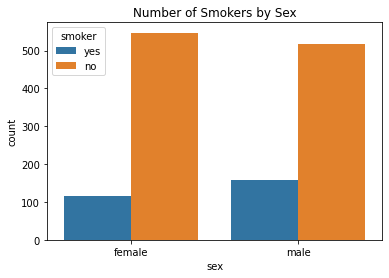

In [17]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [18]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [19]:
#run the Test and save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [20]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Our p value is smaller than alpha(0.05) - we reject the null hypothesis that men and woman have the same chances of being a smoker.

# Q3. Do different regions have different charges, on average?
* Null Hypothesis: on average all regions have the same charges. 
* Alternative Hypothesis: different regions have different charges, on average.

**ANOVA** test for this hypothesis

In [21]:
#check number of regions
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

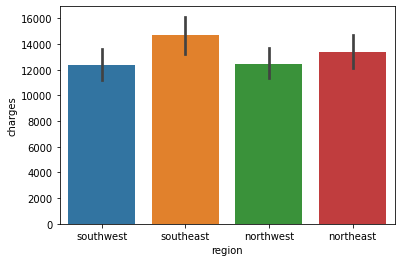

In [22]:
sns.barplot(data=df, x='region',y='charges');

In [23]:
#create groups dictionary. 
groups = {}
#loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [24]:
#running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [25]:
#checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df
##??? True not False

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [26]:
#with the * operator 
stats.levene(*groups.values())
#not equal variance???

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [27]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [29]:
#perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


Our p value is smaller than alpha(0.05) - we reject the null hypothesis that on average all regions have the same charges. We see that there is a significant difference in charges between regions southeast and southwest. 